In [1]:
import lux

In [2]:
import pandas as pd

In [3]:
!python -m jupyter labextension list

JupyterLab v3.4.3
C:\ProgramData\Anaconda3\share\jupyter\labextensions
        jupyterlab-plotly v5.5.0 enabled ok
        jupyterlab_pygments v0.2.2 enabled ok (python, jupyterlab_pygments)
        @jupyter-widgets/jupyterlab-manager v3.1.1 enabled ok (python, jupyterlab_widgets)

Other labextensions (built into JupyterLab)
   app dir: C:\ProgramData\Anaconda3\share\jupyter\lab
        luxwidget v0.1.11 enabled ok


Build recommended, please run `jupyter lab build`:
    luxwidget needs to be included in build


In [4]:
#!python -m jupyter nbextension install --py luxwidget
!python -m jupyter nbextension enable --py luxwidget

Enabling notebook extension luxwidget/extension...
      - Validating: ok


In [5]:
#!python -m jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!python -m jupyter labextension install luxwidget

In [6]:
#To show widgets bby default instead of pandas dataframe
lux.config.default_display = "lux"

In [7]:
#Test code with test dataset to check if Lux is working
df11 = pd.read_csv("https://raw.githubusercontent.com/lux-org/lux-datasets/master/data/college.csv")
df11

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Automated EDA of Superstore Dataset

In [8]:
#Import dataset
df= pd.read_csv("Superstore_dataset.csv")

In [9]:
#The following format specifications were suggested by Lux itself when the df is called.
#The O/P where this was suggested was too long, so I've removed it
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%m-%Y')
df['ShipDate'] = pd.to_datetime(df['ShipDate'], format='%d-%m-%Y')

In [10]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
#For debugging in case widgete isnt visible etc. 
#lux.debug_info()

## Filter for specific columns

In [12]:
df.intent = ["Segment"]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
#Saving the horizontal bar chart of segment-wise counts of records
vis=df.exported[0]
vis

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

# Exporting viz to matplotlib

In [ ]:
print (vis.to_code("matplotlib"))

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df = pd.DataFrame({'Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office'}, 'Record': {0: 5191, 1: 3020, 2: 1783}})
fig, ax = plt.subplots()
bars = df['Segment']
measurements = df['Record']
ax.barh(0       Consumer
1      Corporate
2    Home Office
Name: Segment, dtype: object, 0    5191
1    3020
2    1783
Name: Record, dtype: int64, align='center')
ax.set_xlabel('Record')
ax.set_ylabel('Segment')

fig


Text(0, 0.5, 'Segment')

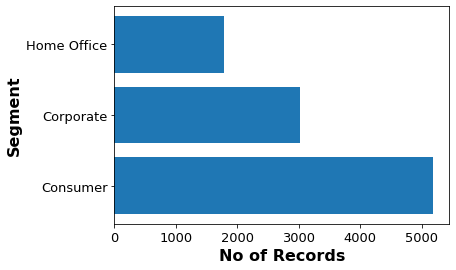

In [ ]:
#I can copy the output code above so that parameters can be modified as per my wishes below
#Minor changes may be necessary to avoid errors; rename dataframe, remove subplots, etc.
import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df_for_chart = pd.DataFrame({'Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office'}, 'Record': {0: 5191, 1: 3020, 2: 1783}})

#fig, ax = plt.subplots()
bars = df_for_chart['Segment']
measurements = df_for_chart['Record']
#ax.barh(bars, measurements, align='center')
#ax.set_xlabel('No of Records')
#ax.set_ylabel('Segment')
plt.barh(bars,measurements, align='center')
plt.xlabel('No of Records')
plt.ylabel('Segment')

#fig

In [ ]:
#Following line doesn't give individual charts even if you select multiple charts
#[print (df.exported[i]) for i in df.exported]

In [15]:
#To export a bunch of charts into a list, select individual charts (except main one of the Intent) and click Export
#The charts get stored as a list of visualizations in the df.exported attribute
bookmarked_charts = df.exported
bookmarked_charts

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

# Filter for multiple columns

In [16]:
#Lets say we want to compare sales amounts across categories
df.intent = ["Sales","Category"]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()